**Problem Statement:**

Automate the loan eligibility process based on customer details provided during an online application.

Dataset Used:
File: loandata.csv

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
df = pd.read_csv("/content/LoanData (1).csv")

In [4]:
# 1. Printing rows of the Data
df.head()   # Display first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# 2. Printing the column names of the DataFrame
df.columns.tolist()  # Get column names

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [6]:
# 3. Summary of Data Frame
df.info()   # Get basic info about DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# 4. Descriptive Statistical Measures of a DataFrame
df.describe()   # Summary statistics for numeric columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
# 5. Missing Data Handling
df.isnull().sum()   # Check for missing values

# Example handling:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [10]:
# 6. Sorting DataFrame values
df.sort_values(by='ApplicantIncome', ascending=False).head()  # Sort by ApplicantIncome in descending order

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y


In [30]:
# 8. Apply Function
# Example: Convert LoanAmount from thousands to lakhs
df['LoanAmount_Lakhs'] = df['LoanAmount'].apply(lambda x: round(x/100,2))
print("LoanAmount_Lakhs:\n ", df.LoanAmount_Lakhs)

LoanAmount_Lakhs:
  0      1.28
1      1.28
2      0.66
3      1.20
4      1.41
       ... 
609    0.71
610    0.40
611    2.53
612    1.87
613    1.33
Name: LoanAmount_Lakhs, Length: 614, dtype: float64


In [21]:
# 9. By using the lambda operator
# Example: Categorize Applicant Income
df['Income_Category'] = df['ApplicantIncome'].apply(lambda x: 'Low' if x < 2500 else ('Medium' if x < 4000 else 'High'))
print("Income_Category: ", df.Income_Category)

Income_Category:  0        High
1        High
2      Medium
3      Medium
4        High
        ...  
609    Medium
610      High
611      High
612      High
613      High
Name: Income_Category, Length: 614, dtype: object


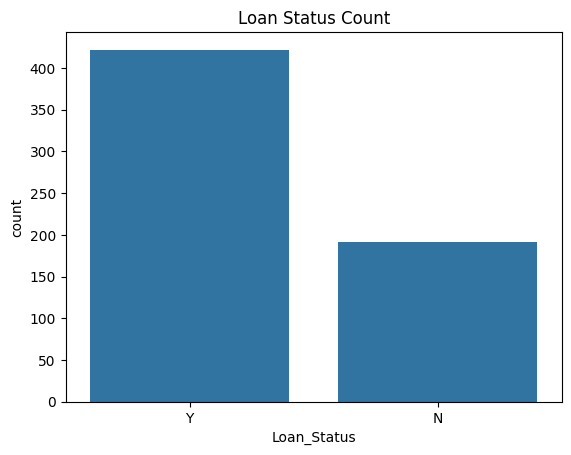

In [12]:
# 10. Visualizing DataFrame
# a) Count plot for Loan Status

sns.countplot(data=df, x='Loan_Status')
plt.title("Loan Status Count")
plt.show()

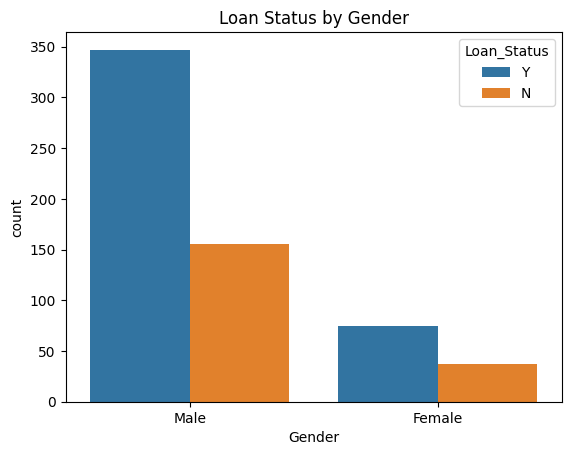

In [13]:
# b) Gender-wise Loan Status

sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title("Loan Status by Gender")
plt.show()

In [14]:
# 11. What is the number of columns in the dataset?

print("Number of columns:", df.shape[1])

Number of columns: 13


In [15]:
# 12. Print the name of all the columns
print("Column names:")
print(df.columns.tolist())

Column names:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [16]:
# 13. How is the dataset indexed?
df.index

RangeIndex(start=0, stop=614, step=1)

In [17]:
# 14. What is the number of observations in the dataset?
print("Number of observations (rows):", df.shape[0])

Number of observations (rows): 614
